In [12]:
import matplotlib.pyplot as plt
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

# Ustvarimo prazen graf
G = nx.Graph()

# Dodamo povezave
G.add_edge(0, 1)
G.add_edge(0, 2)
G.add_edges_from([(1, 3), (2, 3), (3, 4), (3, 5), (4, 6), (5, 6), (6, 7)])

# Dodamo utež na povezavo
G.edges[1, 3]['weight'] = 0.3

# Izpišemo vozlišča in povezave
print("Vozlišča (Nodes):", G.nodes)
print("Povezave (Edges):", G.edges)

Vozlišča (Nodes): [0, 1, 2, 3, 4, 5, 6, 7]
Povezave (Edges): [(0, 1), (0, 2), (1, 3), (2, 3), (3, 4), (3, 5), (4, 6), (5, 6), (6, 7)]


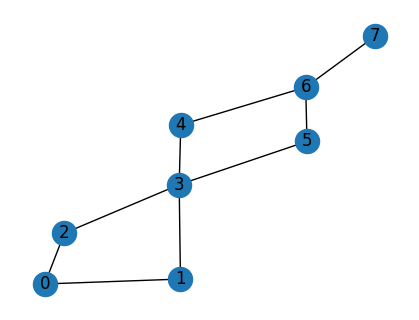

In [13]:
# Pripravimo sliko
plt.figure(figsize=[4, 3])

# Uporabimo spring layout za pozicije vozlišč
pos = nx.spring_layout(G)

# Narišemo graf
nx.draw(G, pos, with_labels=True)

# Prikažemo graf
plt.show()

In [14]:
# Izpišemo matriko sosednosti
adjM = nx.to_numpy_array(G)
print("Matrika sosednosti (Adjacency Matrix):\n", adjM)

Matrika sosednosti (Adjacency Matrix):
 [[0.  1.  1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.3 0.  0.  0.  0. ]
 [1.  0.  0.  1.  0.  0.  0.  0. ]
 [0.  0.3 1.  0.  1.  1.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  1.  0. ]
 [0.  0.  0.  1.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  1.  1.  0.  1. ]
 [0.  0.  0.  0.  0.  0.  1.  0. ]]


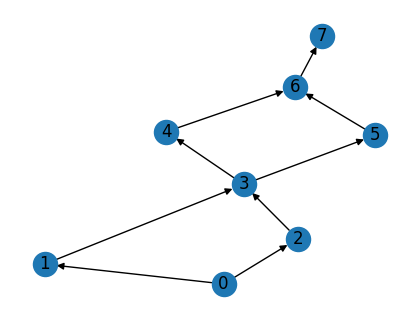

Matrika sosednosti za usmerjen graf (Adjacency Matrix for Directed Graph):
 [[0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [2]:
# Ustvarimo usmerjen graf
DG = nx.DiGraph()

# Dodamo povezave
DG.add_edges_from([(0, 1), (0, 2), (1, 3), (2, 3), (3, 4), (3, 5), (4, 6), (5, 6), (6, 7)])

# Narišemo usmerjen graf
plt.figure(figsize=[4, 3])
nx.draw(DG, pos, with_labels=True, arrows=True)
plt.show()

# Izpišemo matriko sosednosti za usmerjen graf
adjM_directed = nx.to_numpy_array(DG)
print("Matrika sosednosti za usmerjen graf (Adjacency Matrix for Directed Graph):\n", adjM_directed)

In [4]:
from DataStructures import Stack

def dfs_traversal(inputGr, start_node):
    visited = set()
    stack = Stack()
    counter_list = [0]
    node_order = []

    def visit_node(node):
        visited.add(node)
        node_order.append((counter_list[0], node))
        counter_list[0] += 1
        for sosed in inputGr.adj[node]:
            if sosed not in visited:
                stack.push(sosed)

    node = start_node
    visit_node(node)
    while stack.size() > 0:
        node = stack.pop()
        if node not in visited:
            visit_node(node)

    return node_order

# Naložimo graf
G2 = nx.read_graphml('Slo_cities.graphml')

# Izvedemo DFS
nodes_dfs = dfs_traversal(G2, 'Ljubljana')
print("Obiskana vozlišča (Visited nodes):", nodes_dfs)

Obiskana vozlišča (Visited nodes): [(0, 'Ljubljana'), (1, 'Kocevje'), (2, 'Novo mesto'), (3, 'Krsko'), (4, 'Celje'), (5, 'Velenje'), (6, 'Dravograd'), (7, 'Maribor'), (8, 'Ptuj'), (9, 'Murska Sobota'), (10, 'Postojna'), (11, 'Koper'), (12, 'Nova Gorica'), (13, 'Jesenice'), (14, 'Kranj')]


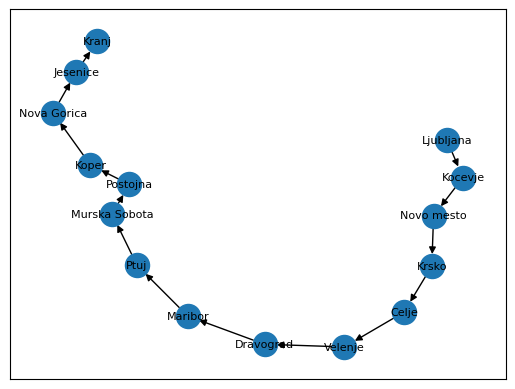

In [5]:
# Ustvarimo usmerjen graf za DFS
G3 = nx.DiGraph()

# Dodamo povezave iz DFS rezultata
for i in range(len(nodes_dfs) - 1):
    G3.add_edge(nodes_dfs[i][1], nodes_dfs[i + 1][1])

# Narišemo graf
plt.figure()
nx.draw_networkx(G3, with_labels=True, font_size=8)
plt.show()

In [6]:
from DataStructures import Queue

def min_edges(inputGr, start_node):
    visited = set()
    queue = Queue()
    counter_list = [0]
    node_order = []

    def visit_node(node, level):
        visited.add(node)
        node_order.append([node, level])
        for sosed in inputGr.adj[node]:
            if sosed not in visited:
                queue.enqueue([sosed, level + 1])

    node = start_node
    visit_node(node, 0)
    while queue.size() > 0:
        node, level = queue.dequeue()
        if node not in visited:
            visit_node(node, level)

    return node_order

# Izvedemo BFS
nodes_bfs = min_edges(G2, 'Ljubljana')
print("Obiskana vozlišča (Visited nodes):", nodes_bfs)

Obiskana vozlišča (Visited nodes): [['Ljubljana', 0], ['Kranj', 1], ['Novo mesto', 1], ['Celje', 1], ['Postojna', 1], ['Kocevje', 1], ['Jesenice', 2], ['Krsko', 2], ['Maribor', 2], ['Velenje', 2], ['Nova Gorica', 2], ['Koper', 2], ['Murska Sobota', 3], ['Ptuj', 3], ['Dravograd', 3]]


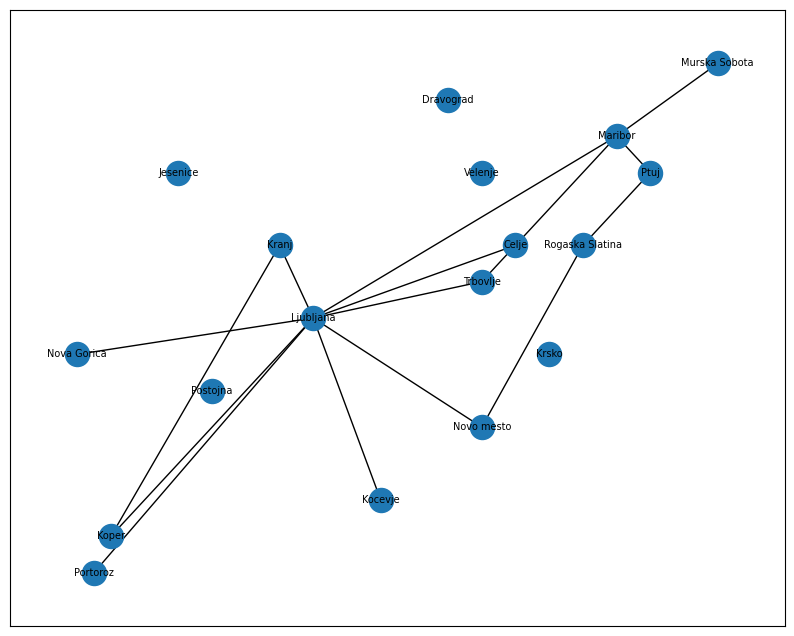

In [7]:
# Ustvarimo graf za ARNES omrežje
GrArnes = nx.Graph()

# Dodamo vozlišča
nodes = [
    ("Ljubljana", {"x": 0, "y": 0}),
    ("Celje", {"x": 6, "y": 2}),
    ("Trbovlje", {"x": 5, "y": 1}),
    ("Maribor", {"x": 9, "y": 5}),
    ("Ptuj", {"x": 10, "y": 4}),
    ("Rogaska Slatina", {"x": 8, "y": 2}),
    ("Murska Sobota", {"x": 12, "y": 7}),
    ("Krsko", {"x": 7, "y": -1}),
    ("Novo mesto", {"x": 5, "y": -3}),
    ("Kocevje", {"x": 2, "y": -5}),
    ("Postojna", {"x": -3, "y": -2}),
    ("Koper", {"x": -6, "y": -6}),
    ("Portoroz", {"x": -6.5, "y": -7}),
    ("Kranj", {"x": -1, "y": 2}),
    ("Jesenice", {"x": -4, "y": 4}),
    ("Nova Gorica", {"x": -7, "y": -1}),
    ("Velenje", {"x": 5, "y": 4}),
    ("Dravograd", {"x": 4, "y": 6}),
]
GrArnes.add_nodes_from(nodes)

# Dodamo povezave z utežmi
edge_list = [
    ("Ljubljana", "Maribor", {"Gb": 20}),
    ("Ljubljana", "Koper", {"Gb": 20}),
    ("Ljubljana", "Nova Gorica", {"Gb": 20}),
    ("Ljubljana", "Kranj", {"Gb": 10}),
    ("Ljubljana", "Celje", {"Gb": 10}),
    ("Ljubljana", "Novo mesto", {"Gb": 10}),
    ("Ljubljana", "Portoroz", {"Gb": 10}),
    ("Koper", "Kranj", {"Gb": 10}),
    ("Novo mesto", "Rogaska Slatina", {"Gb": 10}),
    ("Ptuj", "Rogaska Slatina", {"Gb": 10}),
    ("Celje", "Maribor", {"Gb": 10}),
    ("Ptuj", "Maribor", {"Gb": 10}),
    ("Ljubljana", "Trbovlje", {"Gb": 1}),
    ("Celje", "Trbovlje", {"Gb": 1}),
    ("Ljubljana", "Kocevje", {"Gb": 1}),
    ("Maribor", "Murska Sobota", {"Gb": 1}),
]
GrArnes.add_weighted_edges_from([(e[0], e[1], e[2]["Gb"]) for e in edge_list])

# Narišemo graf
plt.figure(figsize=[10, 8])
pos = {node: (GrArnes.nodes[node]['x'], GrArnes.nodes[node]['y']) for node in GrArnes.nodes}
nx.draw_networkx(GrArnes, pos, with_labels=True, font_size=7)
plt.show()

In [8]:
# Poiščemo kritična vozlišča
apts = list(nx.articulation_points(GrArnes))
print("Kritična vozlišča (Articulation points):", apts)

Kritična vozlišča (Articulation points): ['Maribor', 'Ljubljana']


In [9]:
# Poiščemo najkrajšo pot
start_node = 'Koper'
end_node = 'Maribor'
sp = nx.shortest_path(GrArnes, start_node, end_node, weight='weight')
print("Najkrajša pot (Shortest path):", sp)

# Izpišemo dolžino najkrajše poti
sp_length = nx.shortest_path_length(GrArnes, start_node, end_node, weight='weight')
print("Dolžina najkrajše poti (Shortest path length):", sp_length)

Najkrajša pot (Shortest path): ['Koper', 'Ljubljana', 'Trbovlje', 'Celje', 'Maribor']
Dolžina najkrajše poti (Shortest path length): 32


In [10]:
# Dodamo cene prenosa
for edge in GrArnes.edges:
    GrArnes.edges[edge]['cost'] = 100.0 / GrArnes.edges[edge]['weight']

# Poiščemo pot z najnižjo ceno
sp_cost = nx.shortest_path(GrArnes, 'Koper', 'Murska Sobota', weight='cost')
print("Pot z najnižjo ceno (Path with lowest cost):", sp_cost)

# Izpišemo skupno ceno
total_cost = nx.shortest_path_length(GrArnes, 'Koper', 'Murska Sobota', weight='cost')
print("Skupna cena prenosa (Total transfer cost):", total_cost)

Pot z najnižjo ceno (Path with lowest cost): ['Koper', 'Ljubljana', 'Maribor', 'Murska Sobota']
Skupna cena prenosa (Total transfer cost): 110.0


In [11]:
# Poiščemo maksimalni pretok
flow_value, flow_dict = nx.maximum_flow(GrArnes, 'Koper', 'Maribor', capacity='weight')
print("Maksimalni pretok (Maximum flow):", flow_value)

Maksimalni pretok (Maximum flow): 30


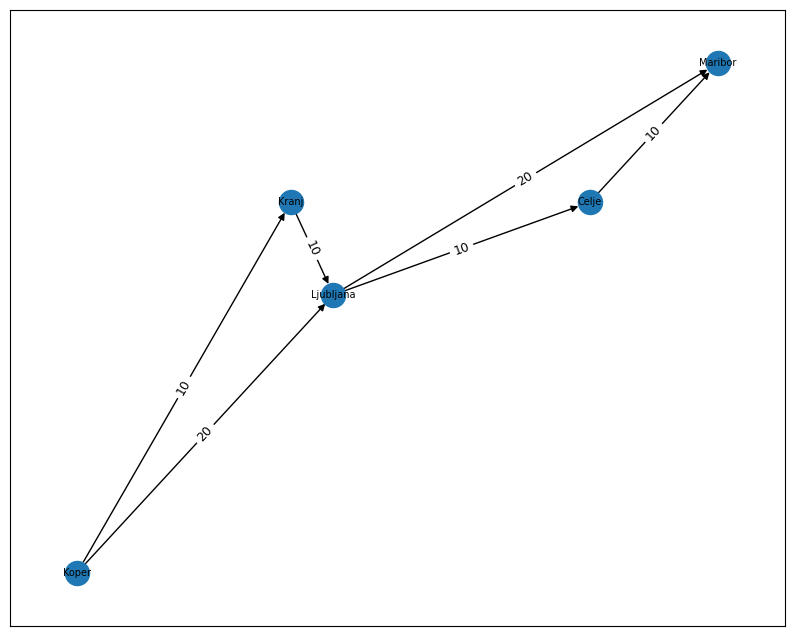

In [15]:
# Ustvarimo usmerjen graf za maksimalni pretok
flow_graph = nx.DiGraph()

# Dodamo povezave, ki so bile uporabljene za maksimalni pretok
for node in flow_dict:
    for sosed, flow in flow_dict[node].items():
        if flow > 0:
            flow_graph.add_edge(node, sosed, weight=flow)

# Narišemo graf
plt.figure(figsize=[10, 8])
pos = {node: (GrArnes.nodes[node]['x'], GrArnes.nodes[node]['y']) for node in GrArnes.nodes}
nx.draw_networkx(flow_graph, pos, with_labels=True, font_size=7, arrows=True)
edge_labels = {(u, v): f"{flow_graph.edges[u, v]['weight']}" for u, v in flow_graph.edges}
nx.draw_networkx_edge_labels(flow_graph, pos, edge_labels=edge_labels, font_size=9)
plt.show()